The objective os this file is to do the bootstrap with 1000 iterations, 200 samples

In [12]:
#Load the required libraries
import pandas
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [13]:
#Load the dataset
resultado=pandas.read_csv('areas_bootstrap.csv')

In [16]:
#Show resultado for visualization
resultado.head(5)

,genusid,muestra,observaciones,OBJECTID
0,115484.0,0,9,47.0
1,104204.0,0,9,47.0
2,104246.0,0,9,47.0
3,115484.0,0,9,47.0
4,104246.0,0,9,47.0


In [ ]:
#Take the number of the areas
areas=resultado['OBJECTID'].unique()

In [ ]:
#Visualize it
areas

array([47., 36., 45., 44., 46., 48., 40., 42., 37., 43., 39., 35., 38.,
       34., 33., 32., 28., 31., 26., 29., 27., 22., 25., 17., 21., 15.,
       10., 20., 18., 19., 13., 16.,  7., 12., 14.,  8.,  9.,  5.,  6.,
        4.,  2., 59.,  3., 62., 60.,  1., 61., 52., 50., 66., 53., 54.,
       63., 56., 64.])

In [ ]:
#Create a new datafile with just the number of the sample and the genusid
resultado=resultado[['muestra','genusid']]

In [ ]:
#Take the number of iterations and the number of samples, we have done it for 100, 200, 500 and 1000 iterations, to check
#the stability of the results
n_iter=100
n_muestras=200

resultados = []

Once we have prepared the data, we can do the bootstrap

In [ ]:
#It goes for each area
for area in areas:

    #In each area, it takes just the rows that are in that area
    df_area = resultado[resultado['OBJECTID'] == area]

    #Take the number of the samples in that area
    muestras_unicas = df_area['muestra'].unique()

    #Check if there are enough samples in that area
    if len(muestras_unicas) < n_muestras:
        print(f"Area {area} has only {len(muestras_unicas)} unique samples, which is less than the required {n_muestras}.")
        continue

    #Initialize a list to store the number of unique genera for each iteration
    generos_por_iteracion = []

    #Iterate for the specified number of iterations
    for i in range(n_iter):

        # Randomly select n_muestras unique samples
        muestras_seleccionadas = np.random.choice(muestras_unicas, n_muestras, replace=False)

        
        #Filter the DataFrame to include only the selected samples
        df_muestra = df_area[df_area['muestra'].isin(muestras_seleccionadas)]

        #Calculates the number of unique genera in the selected samples, it is saved in generos_por_iteracion
        n_generos = df_muestra['genusid'].nunique()
        generos_por_iteracion.append(n_generos)

    #Calculate the mean and standard deviation of the number of unique genera
    mean_generos = np.mean(generos_por_iteracion)
    std_generos = np.std(generos_por_iteracion)

    #Store the results for this area
    resultados.append({
        'area': area,
        'mean_generos': mean_generos,
        'std_generos': std_generos
    })

#Convert the results to a DataFrame
resultados_df = pandas.DataFrame(resultados)

In [ ]:
#Check if it is done correctly
resultados_df

,area,mean_generos,std_generos
0,47.0,230.85,24.789262
1,36.0,166.64,27.299275
2,45.0,256.88,13.130331
3,44.0,203.88,24.369358
4,46.0,378.23,24.601567
5,48.0,207.03,28.200161
6,40.0,101.87,38.857600
7,42.0,248.56,24.827533
8,37.0,134.58,20.093372
9,43.0,343.50,32.410338


In [ ]:
#Sort the results by the number of the OBJECTID, we have sorted the results for all the number of iterations
df_ordenado_100 = resultados_df.sort_values(by='area')

In [ ]:
#Save the results to a CSV file
df_ordenado.to_csv('resultados_bootstrap_500.csv', index=False)

Now, we are going to represent the results of the bootstrap in a map

In [ ]:
#We load the results to visualize them
df_ordenada = pandas.read_csv('resultados_bootstrap.csv')

In [ ]:
#We check the form
df_ordenada.head(1)

,area,mean_generos,std_generos
0,1.0,93.895,9.61093


In [ ]:
#To facilitate the visualization, we will scale the mean_generos values between 0 and 1
df_ordenada['mean_scaled']= (df_ordenada['mean_generos'] - df_ordenada['mean_generos'].min()) / (df_ordenada['mean_generos'].max() - df_ordenada['mean_generos'].min())

In [17]:
# We load the shapefile
shapefile = gpd.read_file(r'C:\Users\glode\OneDrive\Desktop\doctorado\filtrado_obis\nuevas_areas.shp')
shapefile = shapefile.set_crs(epsg=4326)

In [ ]:
#We visualize the first rows
shapefile.head(5)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805..."
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ..."
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ..."
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0..."
4,5,9.0,Labrador - Newfoundland,270.847479,114.597691,"MULTIPOLYGON (((-64.56793 60.45509, -60.09442 ..."


In [ ]:
#We merge the shapefile with the results DataFrame
shapefile_combined = shapefile.merge(df_ordenada, left_on='OBJECTID', right_on='area', how='right')

In [ ]:
#We visualize it
shapefile_combined.head(3)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry,area,mean_generos,std_generos
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805...",1.0,93.895,9.610930
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ...",2.0,104.040,6.498954
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ...",3.0,235.803,23.108358


In [ ]:
#To facilitate the visualization, we will round the values to have only two decimal places
shapefile_combined["mean_generos"] = shapefile_combined["mean_generos"].round(2)

Once we have prepared the visualization, we can create the map

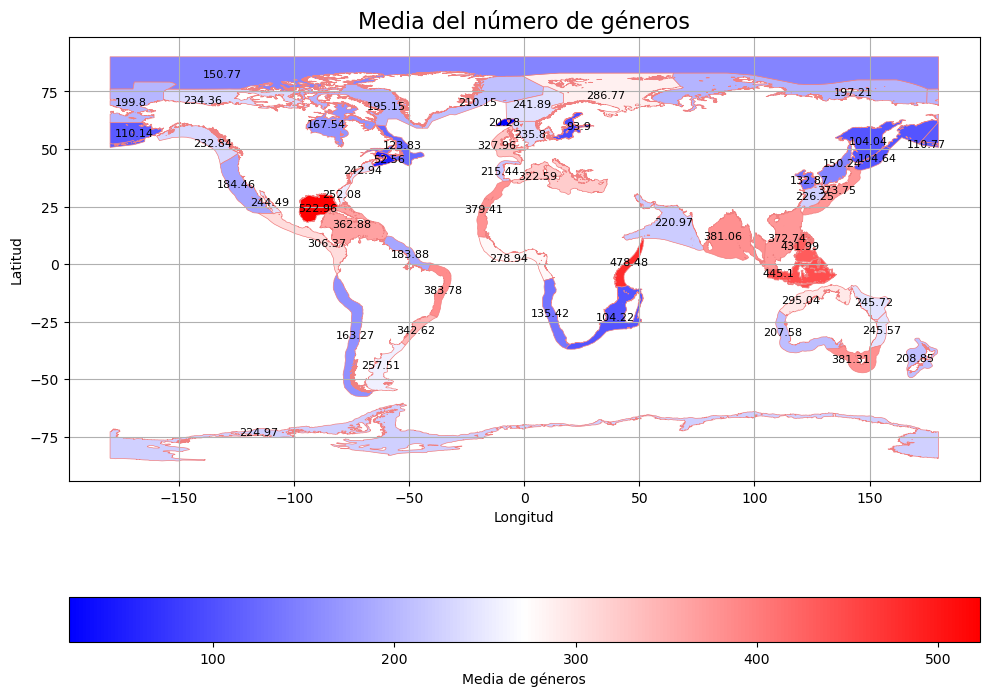

In [14]:
# Crear figura y eje para el mapa
fig, ax = plt.subplots(figsize=(10, 8))



# Colorear las regiones según el valor de 'genusid'
shapefile_combined.plot(column='mean_generos', ax=ax, legend=True,
              legend_kwds={'label': "Media de géneros",
                           'orientation': "horizontal"},
              cmap='bwr',  # Escala de colores (puedes cambiarla)
              edgecolor='lightcoral', linewidth=0.5)

# Agregar etiquetas en puntos representativos dentro de cada polígono
for idx, row in shapefile_combined.iterrows():
    # Obtener un punto representativo dentro del polígono
    representative_point = row.geometry.representative_point()
    
    # Agregar etiqueta en ese punto
    ax.text(representative_point.x, representative_point.y, 
            str(row["mean_generos"]),  # Aquí estamos usando 'OBJECTID'
            fontsize=8, ha='center', va='center', color='black')

# Título y etiquetas
ax.set_title("Media del número de géneros", fontsize=16)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
#We create a new DataFrame with the relevant columns for export
df_ordenado=shapefile_combined[['OBJECTID','mean_generos','std_generos']]

In [ ]:
#We save the results to a CSV file
df_ordenado.to_csv('resultados_bootstrap_index.csv', index=False)

Once it is done the bootstrap for each area, we are going to change it a little bit.  
We are going to do the bootstrap for each area, changing the number of samples, since 1 to the maximum number of samples of each area. It requires a lot of computational power, so it is done in bootstrap_muestras.py

To reduce the needed of computational power, we are not going to do the bootstrap of each area with 1000 iterations, just with the number of iterations that it is required to mantain the stability of the std

The main bootstrap is done for 200 iterations, we have created another bootstraps with 100, 500 and 1000 iterations just to check the stabilization of the std in each area. This is done applying the formula $$diff=\frac{|std200 - std1000|}{std1000}$$

Here, if diff<0.05, we can apply in the bootstrap just 200 iterations  
If 0.05<diff<0.1, we apply in the bootstrap 500 iterations  
If 0.1>diff, we aplly in the bootstrap 1000 iterations

In [ ]:
#We create two vectors, one with the std of 200 iterations and another with the std of 1000 iterations
std_200=df_ordenado_200['std_generos']
std_1000=df_ordenada['std_generos']

In [ ]:
#To assure that it is going to be compared each area, we have to reset the index of the DataFrame
df_ordenado_200.reset_index(drop=True, inplace=True)

In [59]:
df_ordenado_200

,area,mean_generos,std_generos
0,1.0,93.970,10.469914
1,2.0,104.160,6.956608
2,3.0,234.520,19.626757
3,4.0,232.050,24.643204
4,5.0,123.145,10.091282
5,6.0,323.630,29.810621
6,7.0,149.905,9.327699
7,8.0,104.730,8.331092
8,9.0,52.505,11.574540
9,10.0,185.015,30.864944


In [ ]:
#We apply this formula to check the difference between the standard deviations of 200 and 1000 iterations
diff = abs(std_200 - std_1000) / std_1000

In [62]:
diff

0     0.089376
1     0.070420
2     0.150664
3     0.039767
4     0.077130
5     0.069108
6     0.001069
7     0.019459
8     0.044453
9     0.026417
10    0.042027
11    0.019578
12    0.084807
13    0.048982
14    0.061406
15    0.052883
16    0.103598
17    0.015811
18    0.010665
19    0.091575
20    0.061025
21    0.007147
22    0.062263
23    0.030124
24    0.070557
25    0.010094
26    0.059681
27    0.001370
28    0.045955
29    0.048872
30    0.054804
31    0.022353
32    0.033628
33    0.068043
34    0.012441
35    0.045740
36    0.021463
37    0.005444
38    0.004520
39    0.023736
40    0.035314
41    0.043799
42    0.009208
43    0.052991
44    0.005911
45    0.054152
46    0.045313
47    0.035529
48    0.000105
49    0.099298
50    0.049622
51    0.055709
52    0.026121
53    0.114329
54    0.043434
Name: std_generos, dtype: float64

In [ ]:
#We check which areas have a difference in the standard deviation of less than 0.05
np.where(diff<0.05)

(array([ 3,  6,  7,  8,  9, 10, 11, 13, 17, 18, 21, 23, 25, 27, 28, 29, 31,
        32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50, 52, 54],
       dtype=int64),)

In [ ]:
#We check which areas have a difference in the standard deviation bigger than 0.05
df_ordenada.loc[ diff > 0.1, 'area']

2      3.0
16    18.0
53    64.0
Name: area, dtype: float64

In [50]:
std_200

45    10.469914
40     6.956608
42    19.626757
39    24.643204
37    10.091282
38    29.810621
32     9.327699
35     8.331092
36    11.574540
26    30.864944
33    22.247570
30    31.940817
34    36.858079
25    35.437803
31     5.626666
23    41.290991
28    14.653273
29    33.005217
27    21.729344
24    46.185599
21    21.520357
22    44.264925
18    30.971322
20    65.313734
16    32.120704
19    63.516651
17    24.434790
15    25.143245
14    35.791495
13    57.262431
11    43.319787
1     23.987922
8     19.061374
12    27.893926
10    40.724056
6     39.254413
7     21.329392
9     35.049786
3     27.601955
2     15.644283
4     28.544630
0     25.837023
5     26.665099
48     3.668484
47    10.635214
50    23.702953
51    27.609328
53     9.646749
41     7.634782
44    12.185971
46    29.183245
43    18.491887
52     9.762884
54     8.701006
49    10.411532
Name: std_generos, dtype: float64

In [51]:
std_1000

0      9.610930
1      6.498954
2     23.108358
3     25.663770
4     10.934675
5     27.883642
6      9.337682
7      8.496425
8     12.112995
9     30.070583
10    23.223593
11    31.327494
12    40.273542
13    37.263031
14     5.301144
15    39.217064
16    16.346758
17    33.535438
18    21.500046
19    42.310985
20    22.918994
21    44.583549
22    33.027713
23    67.342385
24    34.559103
25    62.881951
26    25.985637
27    25.177728
28    37.515514
29    54.594311
30    45.831535
31    24.536381
32    18.441234
33    29.930493
34    40.223625
35    37.537462
36    20.881227
37    34.860022
38    27.727293
39    15.281554
40    27.570984
41    27.020489
42    26.421813
43     3.483869
44    10.572714
45    25.059990
46    26.412508
47     9.315773
48     7.635586
49    13.529411
50    30.706994
51    19.582818
52    10.024745
53     7.808295
54    10.884282
Name: std_generos, dtype: float64

Finally, to check if the bootstrap has sense, we are going to represent in a scatter plot the mean and the std obtained in the bootstrap, it also shows the number of samples, represented by the color, and the size of the area, represented by the size

In [ ]:
#We read the results from the CSV file, with the number of genera, samples and observations
resultado=pandas.read_csv('numero_generos_muestras_observaciones_nuevo.csv', sep=',')

In [12]:
resultado.head(3)

,OBJECTID,genusid,muestra,num_observaciones
0,1.0,439,55577,727283
1,2.0,131,305,587
2,3.0,1299,158505,1231679


In [ ]:
#We merge the shapefile with the results DataFrame
shapefile_combined=shapefile_combined.merge(resultado, left_on='OBJECTID', right_on='OBJECTID', how='right')

In [17]:
shapefile_combined.head(4)

,OBJECTID,LME_NUMBER,LME_NAME,Shape_Leng,Shape_Area,geometry,mean_generos,std_generos,genusid,muestra,num_observaciones
0,1,23.0,Baltic Sea,219.326402,61.950021,"POLYGON ((10.97944 54.38055, 10.98611 54.37805...",93.895,9.610930,439,55577,727283
1,2,52.0,Sea of Okhotsk,145.932989,213.796584,"MULTIPOLYGON (((156.62592 51.16026, 156.30289 ...",104.040,6.498954,131,305,587
2,3,22.0,North Sea,209.486403,103.965247,"POLYGON ((5.27889 61.98027, 5.24917 61.97388, ...",235.803,23.108358,1299,158505,1231679
3,4,2.0,Gulf of Alaska,468.695688,203.793868,"POLYGON ((-124.59823 47.90313, -125.85582 47.0...",232.839,25.663770,1022,15937,142239


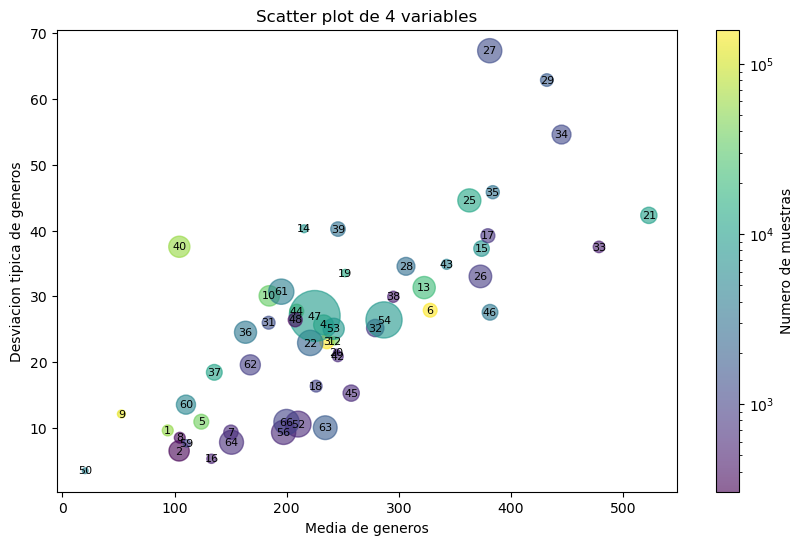

In [ ]:
#We create a scatter plot with the mean of genera, the standard deviation of genera, the number of samples and the area
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    shapefile_combined['mean_generos'],
    shapefile_combined['std_generos'],
    c=shapefile_combined['muestra'],  # color
    s=shapefile_combined['Shape_Area'],   # tamaño
    cmap='viridis',          # mapa de colores opcional
    norm=mcolors.LogNorm(vmin=shapefile_combined['muestra'].min(), vmax=shapefile_combined['muestra'].max()),
    alpha=0.6                # transparencia opcional
)

for idx, row in shapefile_combined.iterrows():
    #pt = row.geometry.representative_point()
    #ax.text(pt.x, pt.y, str(row['muestra']), fontsize=7, ha='center', va='center', color='black')
    plt.text(row['mean_generos'], row['std_generos'], str(row['OBJECTID']),
             fontsize=8, ha='center', va='center')

plt.colorbar(scatter, label='Numero de muestras')
plt.xlabel('Media de generos')
plt.ylabel('Desviacion tipica de generos')
plt.title('Scatter plot de 4 variables')
plt.show()


Finally, we create a new shapefile with the index of the OBJECTID changed. The OBJECTID goes from 0 to the total number of areas

In [ ]:
#We drop the columns that we don't need in the shapefile
shapefile_combined.drop(columns=['area','mean_generos','std_generos'], inplace=True)

In [ ]:
#We save it in a new shapefile
shapefile_combined_1=shapefile_combined

In [ ]:
#We change the object ID to the index of the DataFrame
shapefile_combined['OBJECTID']=shapefile_combined.index

In [ ]:
#We visualize to check if we have done it correctly
shapefile_combined.head(1)

In [ ]:
#Finally, we save the shapefile with the new index
shapefile_combined.to_file("nuevas_areas_index.shp")